In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , MinMaxScaler , Normalizer
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv('/content/Suzlon_Stock_final_data.csv')

In [3]:
df = df.drop(columns=['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1975 entries, 0 to 1974
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             1975 non-null   float64
 1   High             1975 non-null   float64
 2   Low              1975 non-null   float64
 3   Close            1975 non-null   float64
 4   Volume           1975 non-null   float64
 5   Date             1975 non-null   object 
 6   Sentiment_Score  1975 non-null   float64
 7   MA5              1975 non-null   float64
 8   MA10             1975 non-null   float64
 9   MA15             1975 non-null   float64
 10  RSI              1975 non-null   float64
 11  VPT              1974 non-null   float64
 12  Previous_close   1974 non-null   float64
 13  Volatility       1975 non-null   float64
 14  Previous_RSI     1974 non-null   float64
dtypes: float64(14), object(1)
memory usage: 231.6+ KB


In [4]:
df['Next_close'] = df['Close'].shift(periods=1)

**Finding the Correlation between the features**

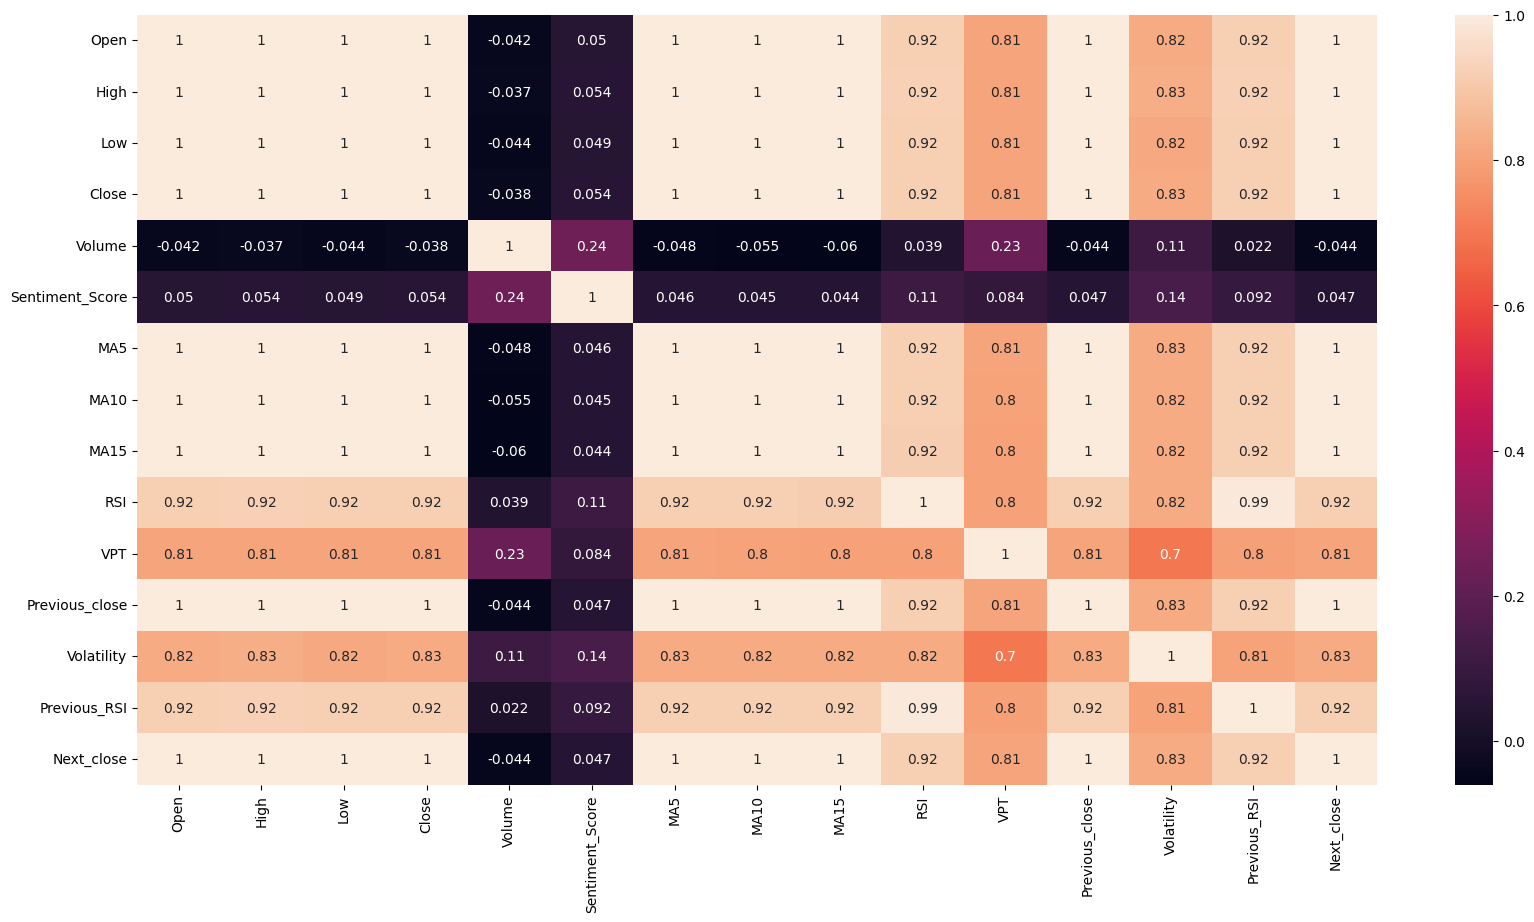

In [5]:
Corr_test = df.drop(columns = ['Date'])
Corr_test = Corr_test.corr()
plt.figure(figsize=(20,10))
sns.heatmap(Corr_test,annot=True,cmap='rocket')
plt.show()

In [60]:
from sklearn.ensemble import RandomForestRegressor

Model = RandomForestRegressor(
    n_estimators=1000,
    max_depth = 30,
    min_samples_split = 4,
    min_samples_leaf = 3,
    criterion = 'absolute_error',
    max_features = 11,
)


In [62]:
from sklearn.model_selection import train_test_split
# X = df[['Open','High','Low','MA5','MA10','MA15','Previous_close','Sentiment_Score','Volatility','RSI','VPT']] Trial one : 23.291477125506063
# X = df[['Sentiment_Score','Volatility','RSI','VPT']]  Trial two : 32.46645686639676
# X = df[['Volatility','RSI']]
Y = df['Next_close']
X = df[['Previous_close','Sentiment_Score','Volatility','Open','High','Low','MA5']]
X = X.dropna()
Y = Y.dropna()
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.95,shuffle=False)

#Creating a Pipeline

In [63]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
pca = PCA(n_components=10)
My_Pipeline  = Pipeline(
    steps = [
        ('Scaler',StandardScaler()),
        ('Model',Model)
    ]
)

My_Pipeline.fit(X_train,Y_train)


Pipeline(steps=[('Scaler', StandardScaler()),
                ('Model',
                 RandomForestRegressor(criterion='absolute_error', max_depth=30,
                                       max_features=11, min_samples_leaf=3,
                                       min_samples_split=4,
                                       n_estimators=1000))])

In [64]:
Preds = My_Pipeline.predict(X_test)

In [65]:
print(f'Error in Data : {mean_absolute_error(Y_test,Preds)} rs')

Error in Data : 0.6981911111110478 rs


In [66]:
Features = ['Previous_close','Sentiment_Score','Volatility','Open','High','Low','MA5']
print('Contibution of each features')
print(np.column_stack((np.array(Features),np.array(Model.feature_importances_))))

Contibution of each features
[['Previous_close' '0.5743270807854763']
 ['Sentiment_Score' '0.00011808200617698453']
 ['Volatility' '0.00012037453015002597']
 ['Open' '0.1212174107350735']
 ['High' '0.11604654998688686']
 ['Low' '0.08596650352461266']
 ['MA5' '0.10220399843162381']]


In [67]:
print('Real Values \tPrediction Values')
print(np.column_stack((Y_test,Preds)))

Real Values 	Prediction Values
[[68.83     68.921875]
 [69.14     69.0427  ]
 [67.43     68.265955]
 [70.85     71.138525]
 [68.89     68.082135]
 [68.15     67.06812 ]
 [66.96     66.20537 ]
 [68.14     66.56191 ]
 [66.34     65.18584 ]
 [67.35     67.413845]
 [69.31     68.274515]
 [66.84     65.269295]
 [62.5      62.751545]
 [62.15     62.391735]
 [59.39     58.266255]
 [54.08     55.86098 ]
 [56.78     57.214485]
 [59.4      60.57645 ]
 [62.35     62.82763 ]
 [62.35     63.43672 ]
 [65.46     64.635905]
 [65.15     64.620335]
 [64.26     63.95807 ]
 [63.55     63.95977 ]
 [63.61     63.74146 ]
 [63.74     63.77173 ]
 [63.       63.62797 ]
 [66.15     65.152495]
 [65.41     64.873385]
 [67.72     66.778315]
 [68.22     67.2429  ]
 [67.37     66.69771 ]
 [67.31     66.623695]
 [66.53     65.69391 ]
 [66.08     64.94887 ]
 [65.75     65.15896 ]
 [66.22     66.01102 ]
 [66.36     66.0443  ]
 [69.44     68.622525]
 [67.95     66.36969 ]
 [67.03     65.553165]
 [64.17     64.471835]
 [6

In [68]:
import joblib
joblib.dump(My_Pipeline,'Prototype-1.pkl')

['Prototype-1.pkl']

**PCA didnt help much**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca = pca.fit(X_train)
pca

PCA(n_components=2)

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
Model.fit(X_train_pca,Y_train)

RandomForestRegressor(criterion='absolute_error', max_features=121,
                      n_estimators=2)

In [ ]:
preds = Model.predict(X_test_pca)

In [ ]:
from sklearn.metrics import mean_absolute_error
print(f'Absolute error in data : {mean_absolute_error(Y_test,preds)} rs ')

Absolute error in data : 30.65783400809717 rs 


In [ ]:
print('Real\tPredicted')
print(np.column_stack((Y_test,preds)))

**Trying Scaler**

In [ ]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler , Normalizer

Min_Scaler_X = MinMaxScaler()
Min_Scaler_Y = MinMaxScaler()

Std_Scaler_X = MinMaxScaler()
Std_Scaler_Y = MinMaxScaler()


In [ ]:
X_MM_train = Std_Scaler_X.fit_transform(X_train)
X_MM_test = Std_Scaler_X.transform(X_test)

Y_MM_train = Std_Scaler_Y.fit_transform(Y_train.values.reshape(-1,1))
Y_MM_test = Std_Scaler_Y.transform(Y_test.values.reshape(-1,1))


In [ ]:
Model.fit(X_MM_train,Y_MM_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(criterion='absolute_error', max_depth=30, max_features=11,
                      min_samples_leaf=3, min_samples_split=4,
                      n_estimators=1000)

In [ ]:
MM_preds = Model.predict(X_MM_test)
MM_preds[1]

np.float64(0.93553917050692)

In [ ]:
MM_preds = Std_Scaler_Y.inverse_transform(MM_preds.reshape(-1,1))
MM_preds[1]

array([19.99108])

In [ ]:
Y_MM_test = Std_Scaler_Y.inverse_transform(Y_MM_test)
Y_MM_test[1]

array([20.04])

In [ ]:
print(f'Shape of test : {Y_MM_test.shape} , Shape of Preds : {MM_preds.shape}')

Shape of test : (395, 1) , Shape of Preds : (395, 1)


In [ ]:
print(f'The error using MinScaler : {mean_absolute_error(Y_MM_test,MM_preds)}')

The error using MinScaler : 29.39722001265838


In [61]:
print(np.column_stack((Y_MM_test,MM_preds)))

NameError: name 'Y_MM_test' is not defined

In [ ]:
X_test[0:7]

,Previous_close,Sentiment_Score,Volatility,Open,High,Low,MA5
1580,20.24,2.6543,0.90,19.56,20.20,19.30,19.800
1581,20.04,0.0516,0.44,20.08,20.49,20.05,20.124
1582,20.25,1.1341,0.64,20.04,20.04,19.40,20.158
1583,19.73,0.4714,0.55,19.77,20.05,19.50,20.010
1584,19.79,2.1237,0.32,20.10,20.15,19.83,19.944
1585,19.91,2.7596,0.95,19.98,20.90,19.95,20.114
1586,20.89,3.2680,0.92,21.01,21.93,21.01,20.450


In [ ]:
X_test[7:15]

,Previous_close,Sentiment_Score,Volatility,Open,High,Low,MA5
1587,21.93,4.4307,1.60,22.70,22.86,21.26,20.802
1588,21.49,3.9909,1.05,21.51,22.56,21.51,21.320
1589,22.38,4.4584,0.27,23.34,23.49,23.22,22.036
1590,23.49,3.1863,0.66,24.30,24.66,24.00,22.790
1591,24.66,4.4551,0.49,25.89,25.89,25.40,23.582
1592,25.89,3.6783,2.40,26.70,27.00,24.60,24.204
1593,24.60,2.5522,1.86,24.57,25.75,23.89,24.724
1594,24.98,1.5002,1.80,25.55,25.66,23.86,24.844


# Design a pipeline